# Data Science Masters :Assignment 25


# Problem:
To predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost algorithm.

# Solution: 

Importing Libraries...

In [1]:
# Mathematical computation
import numpy as np

# DateFrame setup
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Machine learning pkgs
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import train_test_split
from xgboost import plot_tree , plot_importance 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score, recall_score , f1_score

# Data Pre-processing Steps

In [2]:
# loading Dataset
df_AdultData_trainSet = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df_AdultData_testSet = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
# Naming Columns to dataframes
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
df_AdultData_trainSet.columns=col_labels
df_AdultData_testSet.columns=col_labels

In [4]:
df_AdultData_trainSet.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_AdultData_testSet.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Exploring Data - Analysis

In [6]:
# info on training set
df_AdultData_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# info on test set
df_AdultData_testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [8]:
# Statictical observation of training set
df_AdultData_trainSet.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df_AdultData_trainSet.describe(include=[np.object]) # np.object for object type data

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [10]:
df_AdultData_trainSet=df_AdultData_trainSet.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_AdultData_testSet=df_AdultData_testSet.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
# checking for duplicates and dropping the same...
# Training Set
if(df_AdultData_trainSet.duplicated().any()):
    df_AdultData_trainSet=df_AdultData_trainSet.drop_duplicates(keep='first')

# Test Set
if(df_AdultData_testSet.duplicated().any()):
    df_AdultData_testSet=df_AdultData_testSet.drop_duplicates(keep='first')

In [12]:
# Printing unique values in each column in training set
for col in df_AdultData_trainSet.select_dtypes(include=[np.object]).columns:
        print(col , " :" , df_AdultData_trainSet[col].unique(),"\n")

workclass  : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation  : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship  : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race  : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

In [13]:
# Printing unique values in each column in test set
for col in df_AdultData_testSet.select_dtypes(include=[np.object]).columns:
        print(col , " :" , df_AdultData_testSet[col].unique(),"\n")

workclass  : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation  : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship  : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race  : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'


In [14]:
# replacing ? values in dataframe
df_AdultData_trainSet=df_AdultData_trainSet.replace('?', np.nan).dropna()
df_AdultData_testSet=df_AdultData_testSet.replace('?', np.nan).dropna()

In [15]:
# removing . in wage_claas variable in test set
df_AdultData_testSet['wage_class']=df_AdultData_testSet['wage_class'].replace({'<=50K.': '<=50K', '>50K.':'>50K'})

In [16]:
# Replacing Categorial object in dataframe - Training Set
for col in df_AdultData_trainSet.columns:
        if df_AdultData_trainSet[col].dtype=='object':
            df_AdultData_trainSet[col]=pd.Categorical(df_AdultData_trainSet[col]).codes
df_AdultData_trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
age               30139 non-null int64
workclass         30139 non-null int8
fnlwgt            30139 non-null int64
education         30139 non-null int8
education_num     30139 non-null int64
marital_status    30139 non-null int8
occupation        30139 non-null int8
relationship      30139 non-null int8
race              30139 non-null int8
sex               30139 non-null int8
capital_gain      30139 non-null int64
capital_loss      30139 non-null int64
hours_per_week    30139 non-null int64
native_country    30139 non-null int8
wage_class        30139 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.9 MB


In [17]:
# Replacing Categorial object in dataframe - Test Set
for col in df_AdultData_testSet.columns:
        if df_AdultData_testSet[col].dtype=='object':
            df_AdultData_testSet[col]=pd.Categorical(df_AdultData_testSet[col]).codes
df_AdultData_testSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 0 to 16280
Data columns (total 15 columns):
age               15055 non-null int64
workclass         15055 non-null int8
fnlwgt            15055 non-null int64
education         15055 non-null int8
education_num     15055 non-null int64
marital_status    15055 non-null int8
occupation        15055 non-null int8
relationship      15055 non-null int8
race              15055 non-null int8
sex               15055 non-null int8
capital_gain      15055 non-null int64
capital_loss      15055 non-null int64
hours_per_week    15055 non-null int64
native_country    15055 non-null int8
wage_class        15055 non-null int8
dtypes: int64(6), int8(9)
memory usage: 955.6 KB


In [18]:
df_AdultData_trainSet.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0


# Data Visualisation

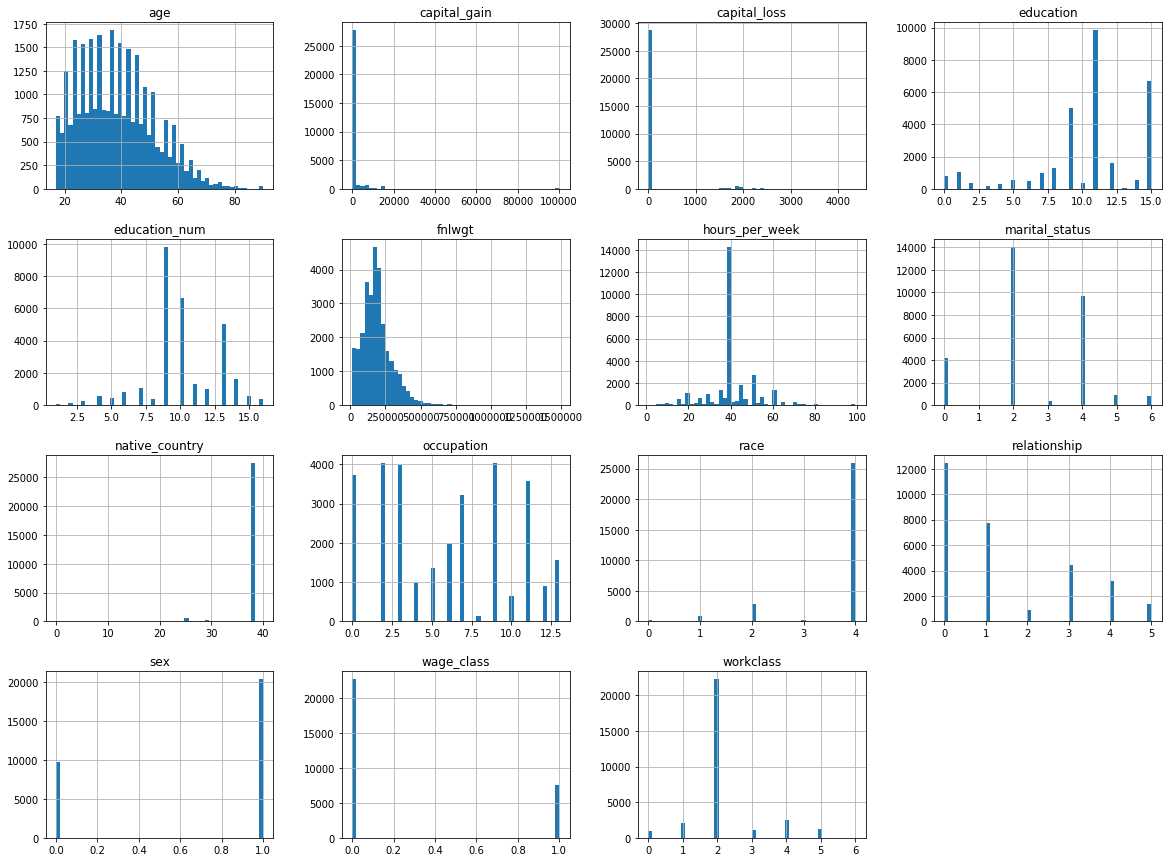

In [19]:
# Training Set
df_AdultData_trainSet.hist(bins=50, figsize=(20,15))
plt.show()

# Train & Test sets

In [20]:
# Spliting Data to Train and test
X_train,X_test , y_train, y_test = train_test_split(df_AdultData_trainSet.iloc[:,:-1], df_AdultData_trainSet.iloc[:,-1:] , test_size=0.3 , random_state=25, shuffle=True)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((21097, 14), (9042, 14), (21097, 1), (9042, 1))

# Modeling - XGBoost

In [21]:
# Define parameter for XGBoost model
params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':500,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':-1}
XGBCls = XGBClassifier(**params)
XGBClsModel =XGBCls.fit(X=X_train, y=np.ravel(y_train))

In [22]:
y_pred_train = XGBClsModel.predict(X_train)
y_pred_prob_train = XGBClsModel.predict_proba(X_train)
print("Training datset")
print("Predicted target variable (first 5 values):",y_pred_train[0:5])
print("Predicted target variable probabilities (first 5 values):",y_pred_prob_train[0:5])

C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training datset
Predicted target variable (first 5 values): [0 1 0 0 1]
Predicted target variable probabilities (first 5 values): [[9.9999917e-01 8.0788692e-07]
 [6.5188587e-02 9.3481141e-01]
 [9.9707270e-01 2.9272775e-03]
 [9.7596651e-01 2.4033478e-02]
 [4.1512251e-03 9.9584877e-01]]


In [23]:
# Confusion Matrix and Classification report
actual_target_variable= y_train
predicted_target_variable= y_pred_train
matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable)
print("Confusion Matrix - Training Set\n",matrix)
print("Classification Report - Training Set\n",report)

Confusion Matrix - Training Set
 [[15837     4]
 [    1  5255]]
Classification Report - Training Set
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     15841
          1       1.00      1.00      1.00      5256

avg / total       1.00      1.00      1.00     21097



In [24]:
# Get precision , recall , acuuracy , and F1-score
actual_target_variable=y_train
predicted_target_variable=y_pred_train
acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
print("Model Accuracy score :", acc_score )
print("Model Precision score :", prec_score )
print("Model Recall score :", recl_score )
print("Model F-1 score :", f1score )

Model Accuracy score : 0.9997629994785988
Model Precision score : 0.999239399125309
Model Recall score : 0.9998097412480974
Model F-1 score : 0.9995244888254873


In [25]:
# Feature Importance based upon Xgboost model

importance = pd.DataFrame.from_dict({'features':X_train.columns, 'importance': XGBClsModel.feature_importances_})
importance=importance.sort_values(by='importance', ascending=False)
importance

,features,importance
2,fnlwgt,0.361771
0,age,0.185020
6,occupation,0.095412
12,hours_per_week,0.094061
3,education,0.060746
4,education_num,0.051920
1,workclass,0.043174
7,relationship,0.031645
5,marital_status,0.024171
13,native_country,0.014471


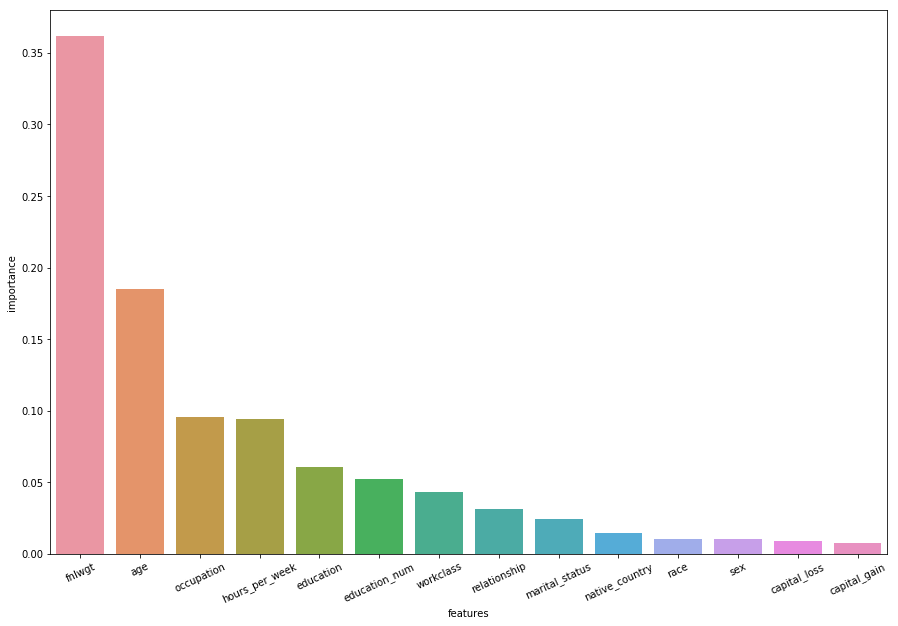

In [26]:
# Visualisation of feature importance
plt.figure(figsize=(15,10))
sns.barplot(importance.features, importance.importance)
plt.xticks(rotation=25)
plt.show()

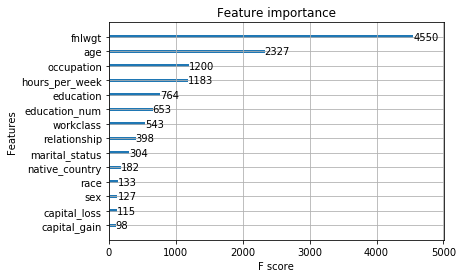

In [27]:
# Feature importance using Xgboost plot_importance
plot_importance(XGBClsModel)

In [28]:
# Model Evaluation on Test -Training set
y_pred_test = XGBClsModel.predict(X_test)
y_pred_prob_test = XGBClsModel.predict_proba(X_test)
print("Test - Training datset")
print("Predicted target variable (first 5 values):",y_pred_test[0:5])
print("Predicted target variable probabilities (first 5 values):",y_pred_prob_test[0:5])

Test - Training datset
Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values): [[7.6140380e-01 2.3859622e-01]
 [9.9998951e-01 1.0511583e-05]
 [9.9900824e-01 9.9174725e-04]
 [2.8100610e-03 9.9718994e-01]
 [8.6246139e-01 1.3753861e-01]]


C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
# Confusion Matrix and Classification report for test-Training Set
actual_target_variable= y_test
predicted_target_variable= y_pred_test
matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable)
print("Confusion Matrix - Test -Training Set\n",matrix)
print("Classification Report Test- Training Set\n",report)

Confusion Matrix - Test -Training Set
 [[6017  775]
 [ 831 1419]]
Classification Report Test- Training Set
              precision    recall  f1-score   support

          0       0.88      0.89      0.88      6792
          1       0.65      0.63      0.64      2250

avg / total       0.82      0.82      0.82      9042



In [30]:
# Get precision , recall , acuuracy , and F1-score
actual_target_variable=y_test
predicted_target_variable=y_pred_test
acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
print("Model Accuracy score :", acc_score )
print("Model Precision score :", prec_score )
print("Model Recall score :", recl_score )
print("Model F-1 score :", f1score )

Model Accuracy score : 0.8223844282238443
Model Precision score : 0.646763901549681
Model Recall score : 0.6306666666666667
Model F-1 score : 0.6386138613861386


# Model Evalution on Test dataset

In [35]:
#Select Feature and target variable 
X_feature= df_AdultData_testSet.iloc[:,:-1]
y_target= df_AdultData_testSet.iloc[:,-1:]

In [36]:
y_pred_test = XGBClsModel.predict(X_feature)
y_pred_prob_test = XGBClsModel.predict_proba(X_feature)
print("Test datset")
print("Predicted target variable (first 5 values):",y_pred_test[0:5])
print("Predicted target variable probabilities (first 5 values):",y_pred_prob_test[0:5])

Test datset
Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values): [[1.0000000e+00 4.6236539e-11]
 [9.9279028e-01 7.2097033e-03]
 [7.3016727e-01 2.6983276e-01]
 [4.8995018e-05 9.9995100e-01]
 [9.9999994e-01 7.1961125e-08]]


C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
# Confusion Matrix and Classification report for test-Training Set
actual_target_variable= y_target
predicted_target_variable= y_pred_test
matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable)
print("Confusion Matrix - Test -Training Set\n",matrix)
print("Classification Report Test- Training Set\n",report)

Confusion Matrix - Test -Training Set
 [[10353  1002]
 [ 1590  2110]]
Classification Report Test- Training Set
              precision    recall  f1-score   support

          0       0.87      0.91      0.89     11355
          1       0.68      0.57      0.62      3700

avg / total       0.82      0.83      0.82     15055



In [38]:
# Get precision , recall , acuuracy , and F1-score
actual_target_variable=y_target
predicted_target_variable=y_pred_test
acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
print("Model Accuracy score :", acc_score )
print("Model Precision score :", prec_score )
print("Model Recall score :", recl_score )
print("Model F-1 score :", f1score )

Model Accuracy score : 0.82783128528728
Model Precision score : 0.6780205655526992
Model Recall score : 0.5702702702702702
Model F-1 score : 0.6194950088079859


In [33]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= XGBClsModel,     # Model to test
                X= df_AdultData_testSet.iloc[:,:-1],  
                y = np.ravel(df_AdultData_testSet.iloc[:,-1:]),             # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sk

Accuracy per fold: 
[0.82071713 0.82602922 0.82934927 0.83266932 0.81606906 0.82724252
 0.8372093  0.82126246 0.84119601 0.80730897]
Average accuracy:  0.8259053266446947


C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Looks like, our Model can predict whether a person makes 50K over year or not with around 82% accuracy 

In [41]:
df_wage=pd.DataFrame(y_pred_test, columns=['wage_class'])
df_wage.wage_class.value_counts(normalize=True)

0    0.793291
1    0.206709
Name: wage_class, dtype: float64

For the given test set, model predicted 79.3% of person were earning wage less than-equal to 50K and rest 20.6% were earning wage more than 50K.